# DSC 209R: Project 1
##Grocery Dataset & Endometriosis
<p>
The following project is to create a visualization based on a grocery store dataset. For my project, I decided to combine this dataset with information on anti-inflammatory foods patients with endometriosis should ideally consume to lessen symptoms.

##Sources
<p>
Below I will list the academic sources I used to determine what an effective endometriosis anti-inflammatory diet looks like.
<p>
“Diet and Lifestyle.” The Endo Foundation, <a href="www.theendometriosisfoundation.org/diet-and-lifestyle">www.theendometriosisfoundation.org/diet-and-lifestyle</a>
<p>
“The Best and Worst Foods for an Anti-Inflammatory Endometriosis Diet.” Cleveland Clinic, <a href="health.clevelandclinic.org/endometriosis-diet">health.clevelandclinic.org/endometriosis-diet</a>
<p>
“Endometriosis.” World Health Organization, 2023, <a href="https://www.who.int/news-room/fact-sheets/detail/endometriosis">https://www.who.int/news-room/fact-sheets/detail/endometriosis</a>

#Importing Libraries
Below are my libraries and Google Drive mount.

In [ ]:
pip install adjustText

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
import re
from adjustText import adjust_text
from matplotlib.patches import FancyBboxPatch
from matplotlib.transforms import Bbox
import matplotlib.patheffects as pe
from matplotlib.patches import Patch

In [ ]:
import matplotlib.font_manager
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'Liberation Sans', 'Nimbus Sans', 'Times New Roman']

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Exploratory Data Analysis
Reading in dataset and taking a look at what is in it.

In [ ]:
grocery = pd.read_csv('/content/drive/MyDrive/DSC 209R/Project 1/grocerydb.csv')
grocery.head(5)

,name,store,category,brand,FPro,FPro_class,price,price percal,package_weight,Protein,Total Fat,Carbohydrate,"Sugars, total","Fiber, total dietary",Sodium,Cholesterol
0,Stonyfield Organic Whole Milk Strawberry Beet ...,Target,baby-food,Stonyfield,0.815250,3.0,5.29,0.043984,396.8930,5.050505,3.030303,12.121212,9.090909,0.000000,0.080808,0.010101
1,Stonyfield Organic Whole Milk Pear Spinach Man...,Target,baby-food,Stonyfield,0.815250,3.0,5.29,0.043984,396.8930,5.050505,3.030303,12.121212,9.090909,0.000000,0.080808,0.010101
2,Once Upon a Farm Organic Mama Blueberry Fruit ...,Target,baby-food,Once Upon a Farm,0.583219,3.0,2.79,0.055973,90.7184,1.098901,0.549451,13.186813,7.692308,2.197802,0.010989,0.000000
3,Once Upon a Farm Organic Strawberry Kids&#39; ...,Target,baby-food,Once Upon a Farm,0.451056,0.0,2.49,0.019213,90.7184,5.494505,7.692308,15.384615,8.791209,3.296703,0.000000,0.000000
4,Horizon Organic Growing Years Strawberry Kids&...,Target,baby-food,DANNON,0.773519,3.0,4.99,0.017781,396.8930,3.030303,1.010101,14.141414,6.060606,2.020202,0.050505,0.005051


In [ ]:
grocery.describe()

,FPro,FPro_class,price,price percal,package_weight,Protein,Total Fat,Carbohydrate,"Sugars, total","Fiber, total dietary",Sodium,Cholesterol
count,26250.000000,26250.000000,22220.000000,20780.000000,24975.000000,26250.000000,26250.000000,26250.000000,26241.000000,26241.000000,26250.000000,26250.000000
mean,0.729352,2.482019,4.635931,0.030000,461.078778,8.694333,12.980660,35.298132,11.882980,3.226263,21.745257,0.031343
std,0.230052,1.026600,3.728634,0.352728,1934.761725,8.960563,14.680180,176.895115,16.699674,5.341033,3380.434877,1.100614
min,0.000000,0.000000,0.030000,0.000013,0.530000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.617533,3.000000,2.500000,0.002932,198.446500,2.916667,1.763700,7.826474,0.769231,0.000000,0.063380,0.000000
50%,0.787416,3.000000,3.790000,0.005741,336.000000,6.666667,8.235294,26.666667,3.898876,1.600000,0.300000,0.000000
75%,0.909438,3.000000,5.690000,0.011670,473.000000,11.764706,20.689655,57.142857,17.500000,3.571429,0.550000,0.018519
max,0.999056,3.000000,72.990000,15.071614,272155.422000,294.642857,266.666667,20000.000000,181.818182,157.894737,547619.047600,127.450980


In [ ]:
grocery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26250 entries, 0 to 26249
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  26250 non-null  object 
 1   store                 26250 non-null  object 
 2   category              26250 non-null  object 
 3   brand                 26181 non-null  object 
 4   FPro                  26250 non-null  float64
 5   FPro_class            26250 non-null  float64
 6   price                 22220 non-null  float64
 7   price percal          20780 non-null  float64
 8   package_weight        24975 non-null  float64
 9   Protein               26250 non-null  float64
 10  Total Fat             26250 non-null  float64
 11  Carbohydrate          26250 non-null  float64
 12  Sugars, total         26241 non-null  float64
 13  Fiber, total dietary  26241 non-null  float64
 14  Sodium                26250 non-null  float64
 15  Cholesterol        

In [ ]:
unique_categories = grocery['category'].unique()
print("Unique categories in the 'category' column:")
print(unique_categories)

Unique categories in the 'category' column:
['baby-food' 'baking' 'bread' 'breakfast' 'cakes' 'cereal' 'cheese'
 'coffee-beans-wf' 'cookies-biscuit' 'culinary-ingredients'
 'dairy-yogurt-drink' 'dressings' 'drink-coffee' 'drink-juice'
 'drink-juice-wf' 'drink-shakes-other' 'drink-soft-energy-mixes'
 'drink-tea' 'drink-water-wf' 'eggs-wf' 'ice-cream-dessert' 'jerky'
 'mac-cheese' 'meat-packaged' 'meat-poultry-wf' 'milk-milk-substitute'
 'muffins-bagels' 'nuts-seeds-wf' 'pasta-noodles' 'pastry-chocolate-candy'
 'pizza' 'prepared-meals-dishes' 'produce-beans-wf' 'produce-packaged'
 'pudding-jello' 'rice-grains-packaged' 'rice-grains-wf'
 'rolls-buns-wraps' 'salad' 'sauce-all' 'sausage-bacon' 'seafood'
 'seafood-wf' 'snacks-bars' 'snacks-chips' 'snacks-dips-salsa'
 'snacks-mixes-crackers' 'snacks-nuts-seeds' 'snacks-popcorn' 'soup-stew'
 'spices-seasoning' 'spread-squeeze']


Decided to drop null values and duplicate rows before proceeding with more EDA.

In [ ]:
## Dropping null values
grocery_cleaned = grocery.dropna()

## Dropping duplicate rows
grocery_db = grocery_cleaned.drop_duplicates()

print("Original DataFrame shape:", grocery.shape)
print("Cleaned DataFrame shape (after dropping nulls and duplicates):", grocery_db.shape)

Original DataFrame shape: (26250, 16)
Cleaned DataFrame shape (after dropping nulls and duplicates): (20680, 16)


array([[<Axes: title={'center': 'FPro'}>,
        <Axes: title={'center': 'FPro_class'}>,
        <Axes: title={'center': 'price'}>],
       [<Axes: title={'center': 'price percal'}>,
        <Axes: title={'center': 'package_weight'}>,
        <Axes: title={'center': 'Protein'}>],
       [<Axes: title={'center': 'Total Fat'}>,
        <Axes: title={'center': 'Carbohydrate'}>,
        <Axes: title={'center': 'Sugars, total'}>],
       [<Axes: title={'center': 'Fiber, total dietary'}>,
        <Axes: title={'center': 'Sodium'}>,
        <Axes: title={'center': 'Cholesterol'}>]], dtype=object)

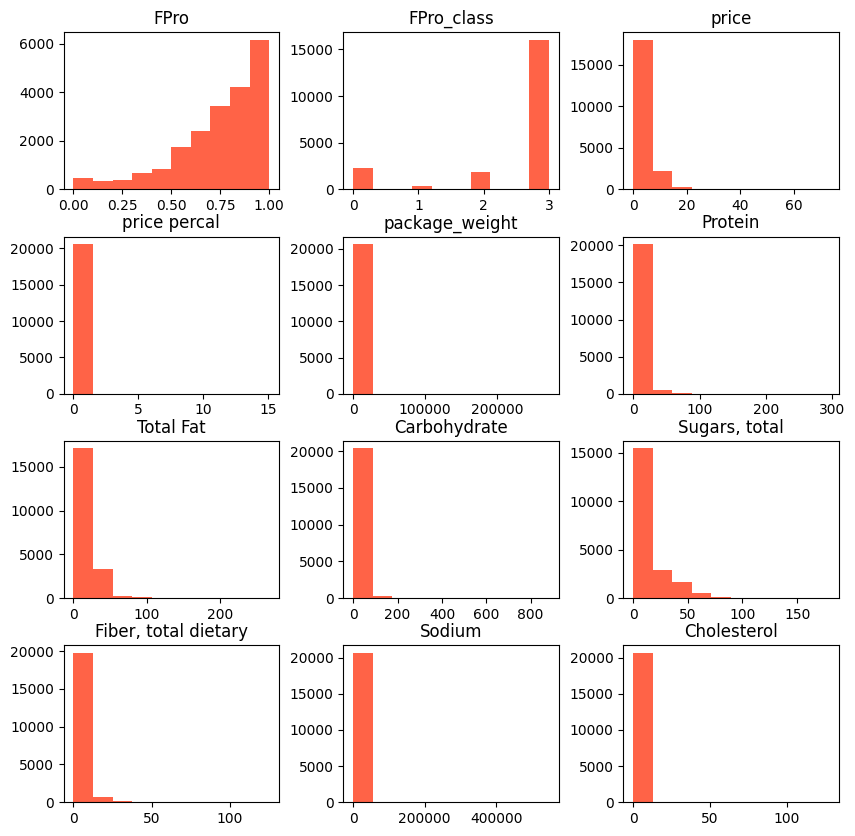

In [ ]:
grocery_db.hist(figsize=(10,10), color='tomato', grid=False)

#Anti-Inflammation Index
Before proceeding with my visualization, I need to figure out a way of summarizing which foods are "helpful" versus "harmful". Sorting based on a single nutritional value is not helpful when one must look at the overall picture of a food when determining diet.

As such, I realized two different values should likely be added for this dataset to function for my purposes: A) an impact index (i.e. +1 is healthy, 0 neutral, -1 unhealthy) and B) a way to average the fiber, sodium, cholesterol, carb, sugar, etc contents to then rank as the "better" choices. This can be done with an Anti-Inflammation Index with is based off each nutrient z-score.


In [ ]:
## creating the z-score function

def z(series):
  s = pd.to_numeric(series, errors='coerce')
  return (s - s.mean()) / (s.std(ddof=0) + 1e-9)

def compute_AII(grocery_db,
                fiber_col,
                sugar_col,
                sodium_col,
                fpro_col,
                carb_col,
                protein_col,
                weights=None):

## Defining the weights of each category, ex we look at fiber as "most beneficial" and fpro as "most harmful"
## so both of these categories would receive the highest weights for good or evil
  w = dict(
      fiber=0.5,
      protein=0.4,
      carb=0.3,
      sugar=0.4,
      sodium=0.3,
      fpro=0.6
  )

  if weights:
      w.update(weights)

  z_fiber = z(grocery_db[fiber_col])
  z_sugar = z(grocery_db[sugar_col])
  z_protein = z(grocery_db[protein_col])
  z_carb = z(grocery_db[carb_col])
  z_sodium = z(grocery_db[sodium_col])
  z_fpro = z(grocery_db[fpro_col])

## Defining good nutrient values vs harmful
  AII = (
      + w["fiber"] * z_fiber
      + w["protein"] * z_protein
      - w["carb"] * z_carb
      - w["sugar"] * z_sugar
      - w["sodium"] * z_sodium
      - w["fpro"] * z_fpro
  )

  return AII

In [ ]:
## Create a copy of the DataFrame to avoid SettingWithCopyWarning
grocery_db = grocery_db.copy()

grocery_db["AII"] = compute_AII(
    grocery_db,
    fiber_col="Fiber, total dietary",
    sugar_col="Sugars, total",
    sodium_col="Sodium",
    fpro_col="FPro",
    carb_col="Carbohydrate",
    protein_col="Protein"
)

##Visualizing Anti-Inflammatory Index
Now that AII has been calculated let's attach to each category and see what our distribution looks like. Will also need to explore what to leave out in terms of category such as baby food given that we are targeted 18+ women.

In [ ]:
## I want to see the categories with their AII
average_aii_by_category = grocery_db.groupby('category')['AII'].mean().sort_values(ascending=False)
print("Average AII by Category:")
display(average_aii_by_category)

Average AII by Category:


,AII
category,
meat-poultry-wf,2.492510
seafood-wf,2.221060
eggs-wf,1.929038
nuts-seeds-wf,1.703827
coffee-beans-wf,1.670751
spices-seasoning,1.488984
produce-beans-wf,1.389813
seafood,1.222378
snacks-nuts-seeds,1.207264


In [ ]:
## Let's filter dataset further to exclude baby food
## This project is looking at women 18+
categories_to_exclude = ['baby-food']
grocery_filtered = grocery_db[~grocery_db['category'].isin(categories_to_exclude)].copy()

print("Original DataFrame shape:", grocery_db.shape)
print("Filtered DataFrame shape:", grocery_filtered.shape)

Original DataFrame shape: (20680, 17)
Filtered DataFrame shape: (20565, 17)


In [ ]:
## Define the bins and labels for categorization with the new ranges
bins = [-float('inf'), -1.0, 0, 1.0, 2.0, float('inf')]
labels = ['most harmful', 'harmful', 'neutral', 'beneficial', 'most beneficial']

## Create a new column 'AII_category' based on the 'AII' values
grocery_filtered['AII_category'] = pd.cut(grocery_filtered['AII'], bins=bins, labels=labels, right=True)

display(grocery_filtered['AII_category'].value_counts())

,count
AII_category,
harmful,7044
neutral,5608
most harmful,3873
beneficial,2747
most beneficial,1293


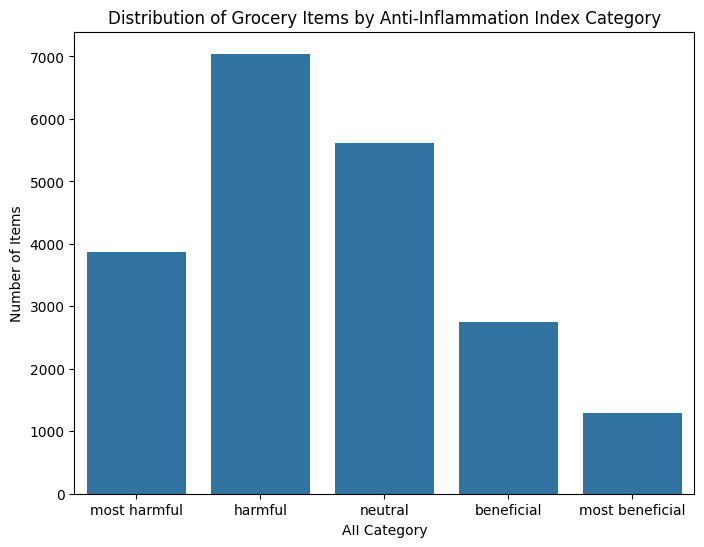

In [ ]:
## Quick graph to see the distribution of foods based on AII

plt.figure(figsize=(8, 6))
sns.countplot(x='AII_category', data=grocery_filtered, order=['most harmful', 'harmful', 'neutral', 'beneficial', 'most beneficial'])
plt.title('Distribution of Grocery Items by Anti-Inflammation Index Category')
plt.xlabel('AII Category')
plt.ylabel('Number of Items')
plt.show()

In [ ]:
## Wanted to see what items are in "breakfast"
## Looks like all frozen/processed foods
breakfast_items = grocery_filtered[grocery_filtered['category'] == 'breakfast']
breakfast_items.head(5)

,name,store,category,brand,FPro,FPro_class,price,price percal,package_weight,Protein,Total Fat,Carbohydrate,"Sugars, total","Fiber, total dietary",Sodium,Cholesterol,AII,AII_category
1197,Krusteaz Belgian Waffle Mix - 28oz,Target,breakfast,Krusteaz,0.933278,3.0,2.39,0.000839,793.78600,7.692308,2.564103,76.923077,17.948718,0.000000,1.256410,0.000000,-1.412887,most harmful
1198,Pillsbury Strawberry Frozen Toaster Strudel - ...,Target,breakfast,Pillsbury,0.890833,3.0,1.99,0.001886,331.68915,4.545455,11.818182,48.181818,17.272727,0.909091,0.272727,0.000000,-1.055139,most harmful
1199,Bisquick Heart Smart Reduced Fat Pancake and B...,Target,breakfast,Bisquick,0.924111,3.0,3.49,0.000879,1133.98000,7.500000,6.250000,67.500000,7.500000,2.500000,0.850000,0.000000,-0.816239,harmful
1200,Kellogg&#39;s Eggo Frozen Homestyle Waffles - ...,Target,breakfast,Eggo,0.967333,3.0,2.39,0.002665,348.69885,5.714286,7.142857,42.857143,5.714286,1.428571,0.500000,0.007143,-0.836124,harmful
1201,Kellogg&#39;s Eggo Chocolatey Chip Frozen Waff...,Target,breakfast,Eggo,0.981833,3.0,2.39,0.002399,348.69885,5.714286,10.000000,45.714286,12.857143,1.428571,0.528571,0.007143,-1.069971,most harmful


In [ ]:
most_beneficial_items = grocery_filtered[grocery_filtered['AII_category'] == 'most beneficial']
display(most_beneficial_items)

,name,store,category,brand,FPro,FPro_class,price,price percal,package_weight,Protein,Total Fat,Carbohydrate,"Sugars, total","Fiber, total dietary",Sodium,Cholesterol,AII,AII_category
128,Baker&#39;s 100% Cacao Unsweetened Chocolate B...,Target,baking,Baker's,0.429889,1.0,2.59,0.004568,113.398093,14.285714,50.000000,28.571429,0.000000,21.428571,0.000000,0.0,3.218010,most beneficial
158,Ghirardelli Unsweetened 100% Cacao Chocolate B...,Target,baking,Ghirardelli,0.371389,1.0,2.49,0.004705,113.398000,13.333333,53.333333,33.333333,0.000000,13.333333,0.000000,0.0,2.494671,most beneficial
177,Lily's Dark Chocolate Baking Chips - 9oz,Target,baking,Lily's Sweets,0.496611,1.0,6.49,0.007122,255.145500,7.142857,28.571429,57.142857,0.000000,35.714286,0.000000,0.0,3.844233,most beneficial
179,Unsweetened Baking Chocolate Bars 100% Cacao -...,Target,baking,Good & Gather,0.385722,1.0,2.39,0.004215,113.398000,14.285714,50.000000,28.571429,0.000000,21.428571,0.000000,0.0,3.336754,most beneficial
182,"Almond Flour, 16 oz",WholeFoods,baking,365 by Whole Foods Market,0.236444,0.0,7.99,0.002936,453.592000,20.000000,53.333333,20.000000,6.666667,6.666667,0.000000,0.0,2.473045,most beneficial
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26225,MaraNatha Creamy No-Stir Coconut Almond Butter...,Walmart,spread-squeeze,MaraNatha,0.481389,2.0,6.98,0.003456,340.194000,18.750000,53.125000,21.875000,9.375000,12.500000,0.171875,0.0,2.248574,most beneficial
26229,"Teddie All Natural Peanut Butter Smooth, 26 oz",Walmart,spread-squeeze,Teddie Natural Peanut Butter,0.497222,2.0,4.43,0.154812,4.819415,25.000000,50.000000,21.875000,3.125000,9.375000,0.390625,0.0,2.323155,most beneficial
26239,MaraNatha No Sugar or Salt Added Creamy Almond...,Walmart,spread-squeeze,MaraNatha,0.272667,0.0,6.98,0.003456,340.194000,21.875000,53.125000,18.750000,0.000000,12.500000,0.000000,0.0,3.197822,most beneficial
26242,"Great Value Powdered Peanut Butter, 30 oz",Walmart,spread-squeeze,Great Value,0.753639,3.0,9.98,0.002816,850.485000,50.000000,12.500000,33.333333,0.000000,8.333333,0.791667,0.0,2.600998,most beneficial


#That's Fishy - Let's Change Scope
After completing initial EDA and a reflection on what I found so far with the dataset, I realized a few limitations.

1) The dataset has categories but not specific item types. Within each category, some items are beneficial AII while others are not. There is no way to discern the difference without manual or addition of another dataset.

2) As such, the current goal with visualization is too broad. I felt that it would take too long to divide up each category with my time crunch and also the project only required ONE visualization.

I decided to get more niche with this project. I asked myself what do I find interesting and what is a question those with endometriosis ask when looking at enhancing their diet? I realized a common topic explored in endometriosis forums is sources of protein, how many turn to fish because an excess of red meat is regarded as harmful.

Although I would love to compare seafood versus red meat at a later date, I decided to focus on comparing which seafood options would be the most beneficial versus not. I decided to divide the seafood into three bins: frozen/processed, fresh, tinned.

Luckily the "seafood" and "seafood-wf" categories already separate fish based on how processed it is, which makes this easier to visualize.

##A Quick Look at Categories
I wanted to visualize what each seafood category contained before I moved on the more filtering/aggregation.

In [ ]:
seafood_wf_items = grocery_filtered[grocery_filtered['category'] == 'seafood-wf']
print("Items in 'seafood-wf' category:")
display(seafood_wf_items)

Items in 'seafood-wf' category:


,name,store,category,brand,FPro,FPro_class,price,price percal,package_weight,Protein,Total Fat,Carbohydrate,"Sugars, total","Fiber, total dietary",Sodium,Cholesterol,AII,AII_category
20482,Wild Caught Sea Scallops - Frozen - 16oz - Goo...,Target,seafood-wf,Good & Gather,0.429486,0.0,19.99,0.062249,453.5920,12.389381,0.442478,3.539823,0.0,0.0,0.159292,0.022124,1.279836,beneficial
20483,Alaska Keta Salmon Skin On Full Side Fillet - ...,Target,seafood-wf,Good & Gather,0.173473,0.0,17.59,0.020940,680.3880,20.282545,3.968324,0.000000,0.0,0.0,0.048502,0.074957,2.351884,most beneficial
20484,Alaska Keta Salmon Skin On Fillets - Frozen - ...,Target,seafood-wf,Good & Gather,0.003778,0.0,16.99,0.020858,680.3880,20.422535,3.521127,0.000000,0.0,0.0,0.049296,0.073944,2.814316,most beneficial
20485,Alaska Sockeye Salmon Skin On Fillets - Frozen...,Target,seafood-wf,Good & Gather,0.003444,0.0,17.99,0.029642,453.5920,22.535211,4.225352,0.000000,0.0,0.0,0.070423,0.049296,2.908754,most beneficial
20486,Alaska Cod Skinless Boneless Fillets - Frozen ...,Target,seafood-wf,Good & Gather,0.247472,0.0,12.39,0.038788,453.5920,17.605634,0.000000,0.000000,0.0,0.0,0.105634,0.045775,2.034403,most beneficial
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20574,Sam's Choice Wild Caught Alaskan Halibut Skinl...,Walmart,seafood-wf,Sam's Choice,0.383446,0.0,19.97,0.073963,340.1940,17.636995,0.440925,0.000000,0.0,0.0,0.052911,0.022046,1.670224,beneficial
20575,Great Value Tilapia Skinless & Boneless Fillet...,Walmart,seafood-wf,Great Value,0.268955,0.0,6.98,0.008725,907.1840,18.518845,1.322775,0.000000,0.0,0.0,0.039683,0.044092,2.017086,most beneficial
20577,Sam's Choice All Natural Wild Alaskan Sockeye ...,Walmart,seafood-wf,Sam's Choice,0.445114,2.0,11.94,0.024861,340.1940,21.176471,5.882353,0.000000,0.0,0.0,111.764706,0.052941,1.652346,beneficial
20578,OYSTER 16 OZ X-SM CUP FR,Walmart,seafood-wf,FRESH SHELLFISH,0.384022,0.0,11.58,0.030397,480.0000,9.700347,2.204624,5.291099,0.0,0.0,0.105822,0.048502,1.266065,beneficial


In [ ]:
seafood_items = grocery_filtered[grocery_filtered['category'] == 'seafood']
print("Items in 'seafood' category:")
display(seafood_items)

Items in 'seafood' category:


,name,store,category,brand,FPro,FPro_class,price,price percal,package_weight,Protein,Total Fat,Carbohydrate,"Sugars, total","Fiber, total dietary",Sodium,Cholesterol,AII,AII_category
20110,Bumble Bee Chunk Light Tuna in Water - 5oz,Target,seafood,Bumble Bee,0.487134,2.0,0.99,0.007892,141.74750,19.469027,0.884956,0.884956,0.000000,0.000000,0.318584,0.048673,1.463988,beneficial
20111,Bumble Bee Solid White Albacore Tuna in Water ...,Target,seafood,Bumble Bee,0.263330,0.0,2.19,0.013430,141.74750,25.663717,0.884956,0.000000,0.000000,0.000000,0.247788,0.044248,2.348548,most beneficial
20112,Bumble Bee Solid White Albacore Tuna in Water ...,Target,seafood,Bumble Bee,0.322449,0.0,4.39,0.146333,340.19400,22.928094,0.000000,0.000000,0.000000,0.000000,0.246918,0.044092,2.068477,most beneficial
20113,Bumble Bee Chunk Light Tuna in Vegetable Oil -...,Target,seafood,Bumble Bee,0.331280,0.0,0.99,0.019800,141.74750,19.400695,4.409249,0.000000,0.000000,0.000000,0.317466,0.044092,1.888545,beneficial
20115,Snow&#39;s Chopped Clams - 6.5oz,Target,seafood,Bumble Bee,0.233319,0.0,1.49,0.119200,141.74750,22.928094,1.763700,0.000000,0.000000,0.000000,0.246918,0.052911,2.308106,most beneficial
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20471,Crab Delights Louis Kemp 16oz Crab Leg Style,Walmart,seafood,Crab Delights,0.814443,3.0,3.98,0.009323,453.59200,7.058824,0.000000,16.470588,3.529412,0.000000,0.505882,0.011765,-0.198923,harmful
20473,Great Value Frozen Raw Large Peeled and Devein...,Walmart,seafood,Great Value,0.523940,3.0,12.64,0.019750,907.18474,13.227747,1.763700,1.763700,0.000000,0.000000,0.740754,0.110231,1.080153,beneficial
20474,Bertolli Shrimp Scampi & Linguine Frozen Meals...,Walmart,seafood,Bertolli,0.786889,3.0,6.48,0.007435,623.68900,4.366812,6.550218,15.283843,0.873362,0.873362,0.327511,0.043668,-0.084874,harmful
20478,Bumble Bee Lemon Sesame & Ginger Seasoned Tuna...,Walmart,seafood,Bumble Bee,0.746403,3.0,1.00,0.012522,70.87375,16.901408,0.704225,8.450704,4.225352,1.408451,0.661972,0.028169,0.618961,neutral


##Let's Rename
An intermediate step to rename the existing categories because the current names just don't make sense.

Next up, I wish to create a third category where the frozen fish is moved to.

Note for later:
*   sf-pckged is tinned fish / packaged fish
*   sf-fresh is obviously fresh fish

In [ ]:
## To make this easier on myself I'm renaming the two existing categories.

grocery_filtered['category'] = grocery_filtered['category'].replace({
    'seafood': 'sf-pckged',
    'seafood-wf': 'sf-fresh'
})

## Double-check the changes went through.
print("Unique categories after renaming:")
print(grocery_filtered['category'].unique())

Unique categories after renaming:
['baking' 'bread' 'breakfast' 'cakes' 'cereal' 'cheese' 'coffee-beans-wf'
 'cookies-biscuit' 'culinary-ingredients' 'dairy-yogurt-drink' 'dressings'
 'drink-coffee' 'drink-juice' 'drink-juice-wf' 'drink-shakes-other'
 'drink-soft-energy-mixes' 'drink-tea' 'eggs-wf' 'ice-cream-dessert'
 'jerky' 'mac-cheese' 'meat-packaged' 'meat-poultry-wf'
 'milk-milk-substitute' 'muffins-bagels' 'nuts-seeds-wf' 'pasta-noodles'
 'pastry-chocolate-candy' 'pizza' 'prepared-meals-dishes'
 'produce-beans-wf' 'produce-packaged' 'pudding-jello'
 'rice-grains-packaged' 'rice-grains-wf' 'rolls-buns-wraps' 'salad'
 'sauce-all' 'sausage-bacon' 'sf-pckged' 'sf-fresh' 'snacks-bars'
 'snacks-chips' 'snacks-dips-salsa' 'snacks-mixes-crackers'
 'snacks-nuts-seeds' 'snacks-popcorn' 'soup-stew' 'spices-seasoning'
 'spread-squeeze']


This is the part where I create a split sf-pckged in two so that there's a clear divide on tinned versus frozen. From here on we also have a new modified dataset we are working with.

In [ ]:
def simplify_seafood_type(category, name):
    """Classify seafood items into fresh/raw, tinned/packaged, or processed/frozen."""
    c = str(category).lower()
    n = str(name).lower() if pd.notna(name) else ""

    if 'sf-fresh' in c:
        return 'fresh'
    elif 'sf-pckged' in c:
        ## Checking for heavily processed frozen/breaded items
        if re.search(r'(frozen|breaded|battered|stick|nugget|imitation)', n):
            return 'processed/frozen'
        else:
            return 'tinned'
    else:
        return 'other'

## Filter to seafood-related rows from the filtered dataset
seafood_df = grocery_filtered[grocery_filtered['category'].str.contains('sf', case=False, na=False)].copy()

## Additional filtering to remove non-seafood items based on name
## (saw these entries after aggregation step below, came back to edit)
non_seafood_keywords = ['apple sauce', 'chicken salad', 'cheese', 'caponata', 'thai']
seafood_df = seafood_df[~seafood_df['name'].str.contains('|'.join(non_seafood_keywords), case=False, na=False)].copy()

seafood_df['seafood_type'] = seafood_df.apply(
    lambda x: simplify_seafood_type(x['category'], x['name']), axis=1
)

display(seafood_df['seafood_type'].value_counts())
seafood_df.head(15)

,count
seafood_type,
tinned,230
processed/frozen,83
fresh,69


,name,store,category,brand,FPro,FPro_class,price,price percal,package_weight,Protein,Total Fat,Carbohydrate,"Sugars, total","Fiber, total dietary",Sodium,Cholesterol,AII,AII_category,seafood_type
20110,Bumble Bee Chunk Light Tuna in Water - 5oz,Target,sf-pckged,Bumble Bee,0.487134,2.0,0.99,0.007892,141.747500,19.469027,0.884956,0.884956,0.000000,0.000000,0.318584,0.048673,1.463988,beneficial,tinned
20111,Bumble Bee Solid White Albacore Tuna in Water ...,Target,sf-pckged,Bumble Bee,0.263330,0.0,2.19,0.013430,141.747500,25.663717,0.884956,0.000000,0.000000,0.000000,0.247788,0.044248,2.348548,most beneficial,tinned
20112,Bumble Bee Solid White Albacore Tuna in Water ...,Target,sf-pckged,Bumble Bee,0.322449,0.0,4.39,0.146333,340.194000,22.928094,0.000000,0.000000,0.000000,0.000000,0.246918,0.044092,2.068477,most beneficial,tinned
20113,Bumble Bee Chunk Light Tuna in Vegetable Oil -...,Target,sf-pckged,Bumble Bee,0.331280,0.0,0.99,0.019800,141.747500,19.400695,4.409249,0.000000,0.000000,0.000000,0.317466,0.044092,1.888545,beneficial,tinned
20115,Snow&#39;s Chopped Clams - 6.5oz,Target,sf-pckged,Bumble Bee,0.233319,0.0,1.49,0.119200,141.747500,22.928094,1.763700,0.000000,0.000000,0.000000,0.246918,0.052911,2.308106,most beneficial,tinned
20116,King Oscar Sardines in Olive Oil - 3.75oz,Target,sf-pckged,King Oscar,0.591469,2.0,2.59,0.011511,106.310625,16.461196,23.515994,0.000000,0.000000,0.000000,0.352740,0.058790,1.058861,beneficial,tinned
20117,Bumble Bee Solid White Albacore Tuna in Water ...,Target,sf-pckged,Bumble Bee,0.232973,0.0,7.89,0.012096,566.990000,25.663717,0.884956,0.000000,0.000000,0.000000,0.247788,0.044248,2.430163,most beneficial,tinned
20118,Bumble Bee Chunk Light Tuna in Water - 5oz/4ct,Target,sf-pckged,Bumble Bee,0.497162,2.0,4.49,0.008948,566.990000,19.469027,0.884956,0.884956,0.000000,0.000000,0.318584,0.048673,1.437027,beneficial,tinned
20119,King Oscar Kipper Snacks - 3.25oz,Target,sf-pckged,King Oscar,0.565637,2.0,1.59,0.013974,100.357230,21.416352,12.597854,0.000000,0.000000,0.000000,0.403131,0.125979,1.347707,beneficial,tinned
20120,Bumble Bee Chunk Light Tuna in Water - 12oz,Target,sf-pckged,Bumble Bee,0.312327,0.0,2.29,0.076333,340.194000,19.400695,0.000000,0.000000,0.000000,0.000000,0.317466,0.052911,1.939502,beneficial,tinned


##New Anti-Inflammatory & FPro Means For Fish
Because we have created a new dataset for the fish only, and we are wanting to visualize the species + prep sub-categories on a graph, we need to recalculate the AIIs and then come up with means for our graph.

I decided the average AII will be on the y-axis while the average fpro is on the x-axis. Therefore, we also need every item sub-category to have an average fpro.

In [ ]:
seafood_df["AII"] = compute_AII(
    seafood_df,
    fiber_col="Fiber, total dietary",
    sugar_col="Sugars, total",
    sodium_col="Sodium",
    fpro_col="FPro",
    carb_col="Carbohydrate",
    protein_col="Protein"
)

seafood_summary = (
    seafood_df.groupby("seafood_type")
          .agg(fpro_mean=("FPro","mean"),
               aii_mean=("AII","mean"),
               n=("name","count"))
          .reset_index()
)
display(seafood_summary)

,seafood_type,fpro_mean,aii_mean,n
0,fresh,0.207241,0.973177,69
1,processed/frozen,0.619819,-1.213931,83
2,tinned,0.492387,0.146118,230


##More Item Labels
Now, let's separate data based on item species and how it is prepped. For this step I entered the most common fish species that can be found at Walmart, Whole Foods, etc, and then added in common preparation such as breaded, smoked, etc.

Note: I discovered while checking the results, "kipper" is another word for herring. One step I did was to look over ALL results that stated fish unspecified and then added in extra species names based on the most obvious. I did leave alone any product names that lacked any indication of the fish species.

I am jokingly thinking of the fish sticks as "mystery meat".

In [ ]:
## Species & prep extractors tuned to grocery product names.
SPECIES_PATTS = [
    (r'\bsardine(s)?\b', 'sardines'),
    (r'\bsalmon\b', 'salmon'),
    (r'\bnova\b', 'salmon'),
    (r'\btuna\b', 'tuna'),
    (r'\bnicoise\b', 'tuna'),
    (r'\bcalifornia\s*roll\b', 'pollock'),
    (r'\bmackerel\b', 'mackerel'),
    (r'\bherring\b', 'herring'),
    (r'\banchov(y|ies)\b', 'anchovies'),
    (r'\bcod\b', 'cod'),
    (r'\btilapia\b', 'tilapia'),
    (r'\bpollock\b', 'pollock'),
    (r'\bshrimp\b', 'shrimp'),
    (r'\bmussel(s)?\b', 'mussels'),
    (r'\bscallop(s)?\b', 'scallops'),
    (r'\bcrab\b', 'crab'),
    (r'\bcrabmeat\b', 'crab'),
    (r'\blobster\b', 'lobster'),
    (r'\boyster(s)?\b', 'oysters'),
    (r'\bclam(s)?\b', 'clams'),
    (r'\bkipper(s)\b', 'herring'),
    (r'\bkipper\b', 'herring'),
    (r'\bsquid\b', 'squid'),
    (r'\bcalamari\b', 'squid'),
    (r'\bmackerel(s)\b', 'mackerel'),
    (r'\bsole\b', 'sole'),
    (r'\bcatfish\b', 'catfish'),
    (r'\bhaddock\b', 'haddock'),
    (r'\bswai\b', 'swai'),
    (r'\balbacore\b', 'albacore'),
    (r'\bhalibut\b', 'halibut'),
    (r'\bsnapper\b', 'snapper'),
    (r'\bwhiting\b', 'whiting'),
    (r'\bswordfish\b', 'swordfish'),
    (r'\bbass\b', 'bass'),
    (r'\bmahi\b', 'mahi mahi'),
    (r'\bflounder\b', 'flounder')
]

PREP_OVERRIDES = [
    (r'(fish\s*stick|fishstick|fish\s*sticks)', 'fish sticks'),
    (r'(breaded|battered)', 'breaded'),
    (r'\bsmoked\b', 'smoked'),
    (r'\bfrozen\b', 'frozen'),
    (r'(in\s+oil|olive\s+oil)', 'in oil'),
    (r'(in\s+water|spring\s+water)', 'in water'),
    (r'(in\s+brine)', 'in brine'),
    (r'(tomato\s*sauce)', 'in tomato sauce'),
]

def extract_species(name: str) -> str:
    n = (name or '').lower()
    for patt, label in SPECIES_PATTS:
        if re.search(patt, n):
            return label
    if re.search(r'fish\s*stick|fishstick', n):
        return 'fish sticks'
    if re.search(r'\bfish\b', n):
        return 'mystery meat'
    return 'unspecified'

def extract_prep_detail(name: str) -> str:
    n = (name or '').lower()
    for patt, label in PREP_OVERRIDES:
        if re.search(patt, n):
            return label
    return ''

## Adding species & prep final labels
seafood_df = seafood_df.copy()
seafood_df['species'] = seafood_df['name'].astype(str).apply(extract_species)
seafood_df['prep_detail'] = seafood_df['name'].astype(str).apply(extract_prep_detail)

def make_item_label(row):
    base = f"{row['seafood_type']} · {row['species']}"
    return base if not row['prep_detail'] else f"{base} · {row['prep_detail']}"

seafood_df['item_label'] = seafood_df.apply(make_item_label, axis=1)

seafood_df[['name','category','seafood_type','species','prep_detail','item_label']].head(400)

,name,category,seafood_type,species,prep_detail,item_label
20110,Bumble Bee Chunk Light Tuna in Water - 5oz,sf-pckged,tinned,tuna,in water,tinned · tuna · in water
20111,Bumble Bee Solid White Albacore Tuna in Water ...,sf-pckged,tinned,tuna,in water,tinned · tuna · in water
20112,Bumble Bee Solid White Albacore Tuna in Water ...,sf-pckged,tinned,tuna,in water,tinned · tuna · in water
20113,Bumble Bee Chunk Light Tuna in Vegetable Oil -...,sf-pckged,tinned,tuna,,tinned · tuna
20115,Snow&#39;s Chopped Clams - 6.5oz,sf-pckged,tinned,clams,,tinned · clams
...,...,...,...,...,...,...
20574,Sam's Choice Wild Caught Alaskan Halibut Skinl...,sf-fresh,fresh,halibut,,fresh · halibut
20575,Great Value Tilapia Skinless & Boneless Fillet...,sf-fresh,fresh,tilapia,,fresh · tilapia
20577,Sam's Choice All Natural Wild Alaskan Sockeye ...,sf-fresh,fresh,salmon,,fresh · salmon
20578,OYSTER 16 OZ X-SM CUP FR,sf-fresh,fresh,oysters,,fresh · oysters


##Aggregation Step
Next is an aggregation step once again, this time we are aggregating by the item label and also filtering items that fall into the three "valid types" of fresh/raw, tinned/packaged, and processed/frozen.

In [ ]:
valid_types = {'fresh', 'tinned', 'processed/frozen'}
tmp = seafood_df[seafood_df['seafood_type'].isin(valid_types)].copy()

## Require a minimum count so labels are stable (tune min_n).
min_n = 3

item_agg = (
    tmp.groupby('item_label')
      .agg(fpro_mean=('FPro','mean'),
           aii_mean=('AII','mean'),
           n=('name','count'))
      .reset_index()
)

item_agg = item_agg[item_agg['n'] >= min_n].sort_values('aii_mean', ascending=False)
item_agg.head(29)

,item_label,fpro_mean,aii_mean,n
25,fresh · tuna,0.278552,1.717375,3
14,fresh · salmon · frozen,0.049579,1.529025,6
19,fresh · shrimp,0.189024,1.048687,4
13,fresh · salmon,0.204362,1.023610,16
24,fresh · tilapia,0.176500,0.939259,6
47,tinned · anchovies · in oil,0.441766,0.858976,4
69,tinned · sardines · smoked,0.328272,0.712223,3
9,fresh · lobster · frozen,0.268032,0.696637,3
78,tinned · tuna · in water,0.365728,0.667480,50
62,tinned · salmon,0.476233,0.647712,25


In [ ]:
item_agg.shape

(28, 4)

#The Moment of Truth: FISH PLOT!
Finally, after much manipulating of the data, smacking it around until I got what I wanted from it, it is time to build the visual. In the previous step, the aggregated dataframe's shape showed 28 rows. Given this number is low, I decided it would be acceptable to proceed with a bubble chart as planned as it should not be too cluttered.

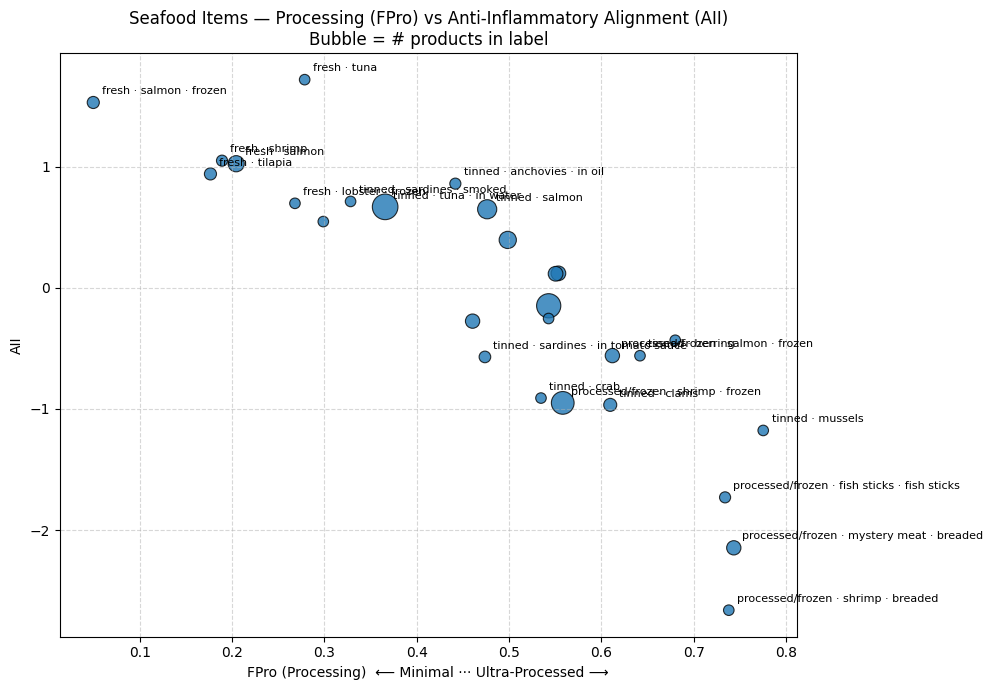

In [ ]:
import matplotlib.pyplot as plt

sizes = 300 * (item_agg['n'] / item_agg['n'].max()) + 40

plt.figure(figsize=(10,7))
plt.scatter(item_agg['fpro_mean'], item_agg['aii_mean'],
            s=sizes, alpha=0.8, edgecolors='black', linewidths=0.8)

# annotate a manageable subset: top/bottom by AIC
to_annot = pd.concat([
    item_agg.nlargest(10, 'aii_mean'),
    item_agg.nsmallest(10, 'aii_mean')
]).drop_duplicates('item_label')

for _, r in to_annot.iterrows():
    plt.annotate(r['item_label'], (r['fpro_mean'], r['aii_mean']),
                 textcoords='offset points', xytext=(6,6), fontsize=8)

plt.title("Seafood Items — Processing (FPro) vs Anti-Inflammatory Alignment (AII)\nBubble = # products in label")
plt.xlabel("FPro (Processing)  ⟵ Minimal ··· Ultra-Processed ⟶")
plt.ylabel("AII")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

I decided to keep the initial graph made above for my reference. A few things on immediate review:
1) The labels are all on top of each other and too long
2) I want the bubbles to have different shapes based on their AII category
3) I will need a key and a way to make this more aesthetically pleasing
4) When plotting, I noticed that the food items are mostly clustered by their classification.

In [ ]:
## Reminder of the item labels
print("Unique item_labels (in one column):")
display(pd.Series(item_agg['item_label'].unique()))

Unique item_labels (in one column):


,0
0,fresh · tuna
1,fresh · salmon · frozen
2,fresh · shrimp
3,fresh · salmon
4,fresh · tilapia
5,tinned · anchovies · in oil
6,tinned · sardines · smoked
7,fresh · lobster · frozen
8,tinned · tuna · in water
9,tinned · salmon


###Visuals Process (Hiding the Uggos)
This section is of the plots I initally started with before refining further.

Columns in item_agg after creation and filtering:


/tmp/ipython-input-2395087811.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tmp.groupby(['item_label', 'AII_category', 'seafood_type']) # Include seafood_type in groupby


Index(['item_label', 'AII_category', 'seafood_type', 'fpro_mean', 'aii_mean',
       'n'],
      dtype='object')

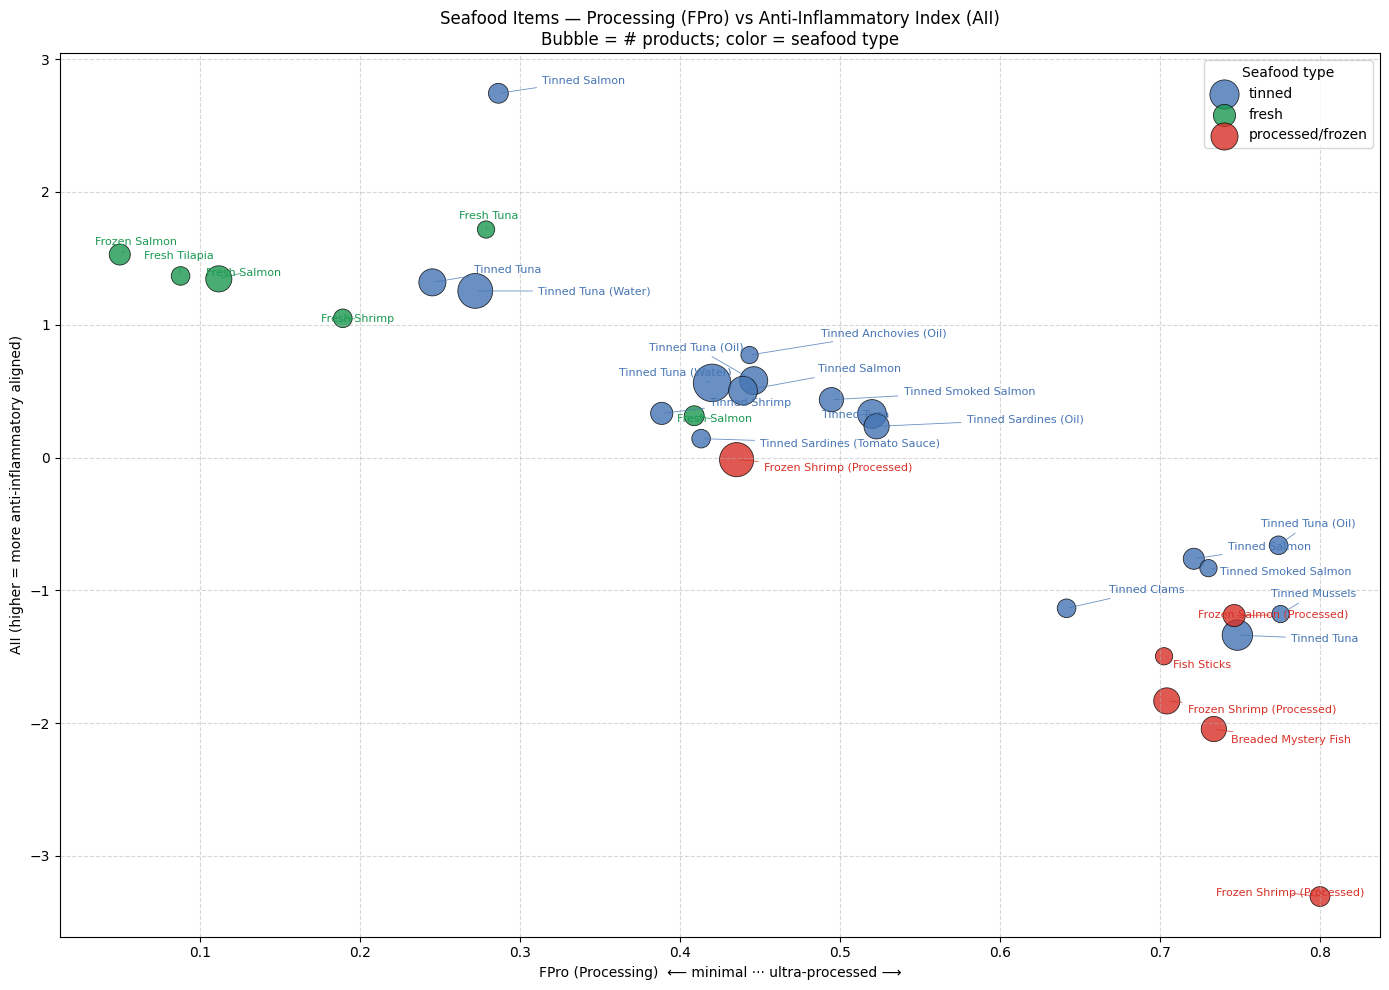

In [ ]:
custom_annotations = {
'fresh · tuna': 'Fresh Tuna',
'fresh · salmon · frozen': 'Frozen Salmon',
'fresh · shrimp': 'Fresh Shrimp',
'fresh · salmon': 'Fresh Salmon',
'fresh · tilapia': 'Fresh Tilapia',
'tinned · anchovies · in oil': 'Tinned Anchovies (Oil)',
'tinned · sardines · smoked': 'Tinned Smoked Sardines',
'fresh · lobster · frozen': 'Frozen Lobster',
'tinned · tuna · in water': 'Tinned Tuna (Water)',
'tinned · salmon': 'Tinned Salmon',
'fresh · cod · frozen': 'Frozen Cod',
'tinned · tuna · in oil': 'Tinned Tuna (Oil)',
'tinned · salmon · smoked': 'Tinned Smoked Salmon',
'tinned · sardines · in oil': 'Tinned Sardines (Oil)',
'tinned · tuna': 'Tinned Tuna',
'processed/frozen · cod · frozen': 'Frozen Cod',
'tinned · shrimp': 'Tinned Shrimp',
'tinned · squid': 'Tinned Squid',
'processed/frozen · salmon · frozen': 'Frozen Salmon (Processed)',
'tinned · herring': 'Tinned Herring',
'tinned · sardines · in tomato sauce': 'Tinned Sardines (Tomato Sauce)',
'tinned · crab': 'Tinned Crab',
'processed/frozen · shrimp · frozen': 'Frozen Shrimp (Processed)',
'tinned · clams': 'Tinned Clams',
'tinned · mussels': 'Tinned Mussels',
'processed/frozen · fish sticks · fish sticks': 'Fish Sticks',
'processed/frozen · mystery meat · breaded': 'Breaded Mystery Fish',
'processed/frozen · shrimp · breaded': 'Breaded Shrimp'
}

type_color = {"fresh":"#1a9850", "tinned":"#4575b4", "processed/frozen":"#d73027"} # Corrected keys to match seafood_type values
# sizes = 280 * (item_agg["n"] / item_agg["n"].max()) + 80 # Calculate sizes after item_agg is finalized

# Filter to seafood-related rows from the filtered dataset and create item_label
valid_types = {'fresh', 'tinned', 'processed/frozen'}
tmp = seafood_df[seafood_df['seafood_type'].isin(valid_types)].copy()

## Require a minimum count so labels are stable (tune min_n).
min_n = 3

# Calculate the mean FPro and AII for each item_label while preserving AII_category and seafood_type
item_agg = (
    tmp.groupby(['item_label', 'AII_category', 'seafood_type']) # Include seafood_type in groupby
      .agg(fpro_mean=('FPro','mean'),
           aii_mean=('AII','mean'),
           n=('name','count'))
      .reset_index()
)

# Filter based on minimum count
item_agg = item_agg[item_agg['n'] >= min_n]
item_agg = item_agg.sort_values('aii_mean', ascending=False)

# Display columns of item_agg after creation and filtering for debugging
print("Columns in item_agg after creation and filtering:")
display(item_agg.columns)


# Create the 'display_label' column by mapping 'item_label' to 'custom_annotations'
# Ensure item_agg has 'item_label' before mapping
if 'item_label' in item_agg.columns:
    item_agg['display_label'] = item_agg['item_label'].map(custom_annotations)
else:
    print("Error: 'item_label' column not found in item_agg.")
    # You might want to handle this error further, depending on expected behavior

# Calculate sizes based on FPro score now that item_agg is finalized
sizes = 1200 * (item_agg["n"] / item_agg["n"].max()) + 550


plt.figure(figsize=(14, 10))
# Iterate through unique seafood types in item_agg and filter for plotting
for stype in item_agg['seafood_type'].unique():
    sub = item_agg[item_agg['seafood_type'] == stype]
    c = type_color.get(stype, "#555")
    plt.scatter(sub["fpro_mean"], sub["aii_mean"],
                s=650 * (sub["n"] / item_agg["n"].max()) + 80, # Use n from subgroup
                alpha=0.8, edgecolors="black", linewidths=0.6, color=c, label=stype)

texts = []
for _, r in item_agg.iterrows():
    x, y = float(r["fpro_mean"]), float(r["aii_mean"])
    dx = 0.02 if r["seafood_type"] == "tinned" else (-0.02 if r["seafood_type"] == "fresh" else 0.0) # Corrected seafood_type values
    dy = 0.03 if r["seafood_type"] != "processed/frozen" else -0.03
    ann = plt.annotate(r["display_label"], xy=(x, y), xytext=(x+dx, y+dy),
                       textcoords="data", fontsize=8, color=type_color.get(r["seafood_type"],"#333"),
                       arrowprops=dict(arrowstyle='-', lw=0.6, color=type_color.get(r["seafood_type"],"#333"), alpha=0.8))
    texts.append(ann)

try:
    from adjustText import adjust_text
    adjust_text(texts,
                expand_text=(1.15,1.35),
                expand_points=(1.15,1.35),
                force_text=0.6, force_points=0.3,
                only_move={'points':'y', 'text':'xy'},
                lim=250)
except Exception:
    pass

plt.title("Seafood Items — Processing (FPro) vs Anti-Inflammatory Index (AII)\nBubble = # products; color = seafood type")
plt.xlabel("FPro (Processing)  ⟵ minimal ··· ultra-processed ⟶")
plt.ylabel("AII (higher = more anti-inflammatory aligned)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(title="Seafood type", frameon=True)
plt.tight_layout()
plt.show()

/tmp/ipython-input-1003153719.py:51: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tmp.groupby(['item_label', 'AII_category', 'seafood_type'])
/tmp/ipython-input-1003153719.py:75: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for (stype, hclass), sub in item_agg.groupby(['seafood_type','AII_category']):


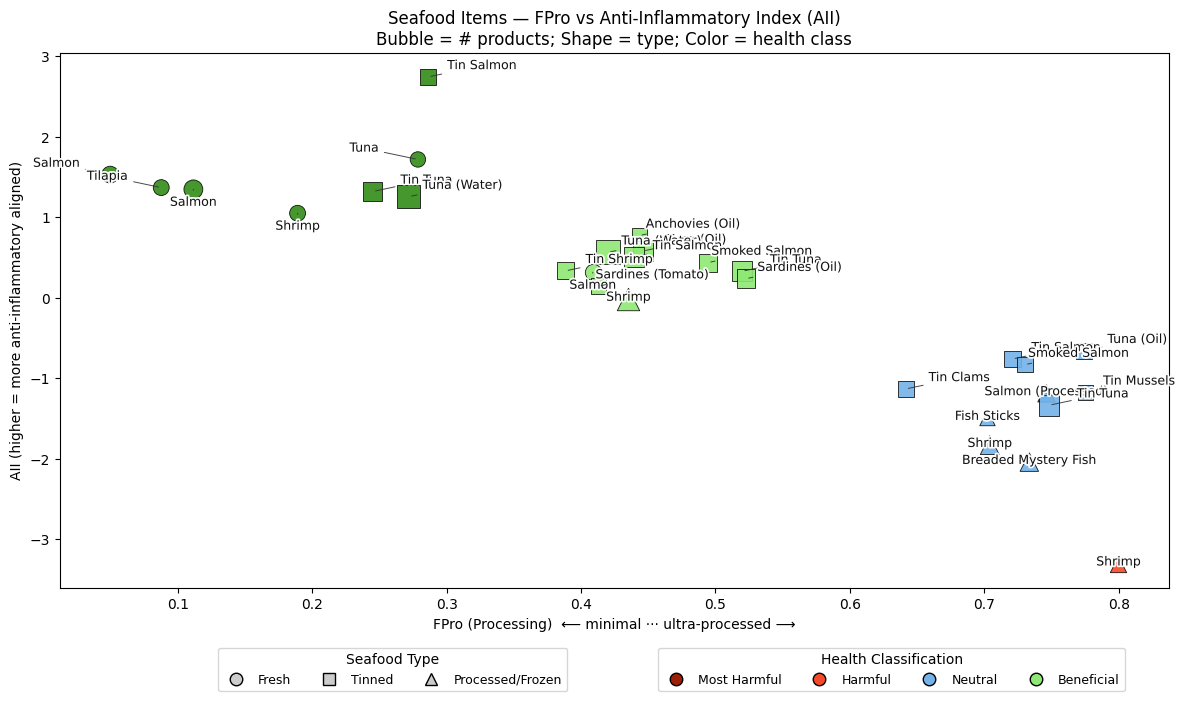

In [ ]:
custom_annotations = {
    'fresh · tuna': 'Tuna',
    'fresh · salmon · frozen': 'Salmon',
    'fresh · shrimp': 'Shrimp',
    'fresh · salmon': 'Salmon',
    'fresh · tilapia': 'Tilapia',
    'tinned · anchovies · in oil': 'Anchovies (Oil)',
    'tinned · sardines · smoked': 'Smoked Sardines',
    'fresh · lobster · frozen': 'Lobster',
    'tinned · tuna · in water': 'Tuna (Water)',
    'tinned · salmon': 'Tin Salmon',
    'fresh · cod · frozen': 'Cod',
    'tinned · tuna · in oil': 'Tuna (Oil)',
    'tinned · salmon · smoked': 'Smoked Salmon',
    'tinned · sardines · in oil': 'Sardines (Oil)',
    'tinned · tuna': 'Tin Tuna',
    'processed/frozen · cod · frozen': 'Cod',
    'tinned · shrimp': 'Tin Shrimp',
    'tinned · squid': 'Tin Squid',
    'processed/frozen · salmon · frozen': 'Salmon (Processed)',
    'tinned · herring': 'Tin Herring',
    'tinned · sardines · in tomato sauce': 'Sardines (Tomato)',
    'tinned · crab': 'Tin Crab',
    'processed/frozen · shrimp · frozen': 'Shrimp',
    'tinned · clams': 'Tin Clams',
    'tinned · mussels': 'Tin Mussels',
    'processed/frozen · fish sticks · fish sticks': 'Fish Sticks',
    'processed/frozen · mystery meat · breaded': 'Breaded Mystery Fish',
    'processed/frozen · shrimp · breaded': 'Breaded Shrimp'
}

health_color = {
    "most harmful":      "#9C2007",
    "harmful":           "#F54927",
    "neutral":           "#73B3E8",
    "beneficial":        "#8EE873",
    "most beneficial":   "#328C17",
}

type_marker = {
    "fresh": "o",
    "tinned": "s",
    "processed/frozen": "^",
}

valid_types = {'fresh', 'tinned', 'processed/frozen'}
tmp = seafood_df[seafood_df['seafood_type'].isin(valid_types)].copy()

min_n = 3
item_agg = (
    tmp.groupby(['item_label', 'AII_category', 'seafood_type'])
      .agg(fpro_mean=('FPro','mean'),
           aii_mean =('AII','mean'),
           n=('name','count'))
      .reset_index()
)
item_agg = item_agg[item_agg['n'] >= min_n].sort_values('aii_mean', ascending=False)

def _fallback_label(lbl: str) -> str:
    parts = [p.strip() for p in (lbl or "").split("·")]
    if not parts: return lbl
    head = parts[0].strip().title()
    rest = " — ".join(p.strip().lower().capitalize() for p in parts[1:]) if len(parts) > 1 else ""
    return f"{head} {rest}".strip()

item_agg['display_label'] = item_agg['item_label'].map(custom_annotations)
item_agg['display_label'] = item_agg['display_label'].fillna(item_agg['item_label'].apply(_fallback_label))

## bubble sizes
sizes = 200 * (item_agg["n"] / item_agg["n"].max()) + 80

plt.figure(figsize=(12, 7))

for (stype, hclass), sub in item_agg.groupby(['seafood_type','AII_category']):
    mk = type_marker.get(stype, "o")
    c  = health_color.get(str(hclass).strip().lower(), "#777777")
    plt.scatter(sub["fpro_mean"], sub["aii_mean"],
                s=200 * (sub["n"] / item_agg["n"].max()) + 100,
                alpha=0.9, edgecolors="black", linewidths=0.6,
                color=c, marker=mk)

place_below = {'fresh · shrimp', 'fresh · salmon'}

texts = []
for _, r in item_agg.iterrows():
    x, y = float(r["fpro_mean"]), float(r["aii_mean"])
    raw_label = r["item_label"]
    disp = r["display_label"]
    st = r["seafood_type"]

    base_dx = 0.04 if st == "tinned" else (-0.04 if st == "fresh" else 0.0)
    base_dy = 0.06 if st != "processed/frozen" else -0.06

    if raw_label in place_below or disp in place_below:
        base_dx, base_dy = 0.0, -0.08
        va = "top"
    else:
        va = "bottom"

    ann = plt.annotate(
        disp,
        xy=(x, y),
        xytext=(x + base_dx, y + base_dy),
        textcoords="data",
        fontsize=9,
        color="#111",
        va=va,
        ha="center",
        arrowprops=dict(arrowstyle='-', lw=0.7, color="#333", alpha=0.9)
    )
    ann.set_path_effects([
        pe.withStroke(linewidth=2.6, foreground="white", alpha=0.95)
    ])
    texts.append(ann)


plt.subplots_adjust(bottom=0.28)

shape_handles = [
    Line2D([0],[0], marker=type_marker[k], color='none',
           markerfacecolor='#cccccc', markeredgecolor='black',
           label=k.title(), markersize=9)
    for k in ["fresh","tinned","processed/frozen"]
]

color_handles = [
    Line2D([0],[0], marker='o', color='none',
           markerfacecolor=health_color[k], markeredgecolor='black',
           label=k.title(), markersize=9)
    for k in ["most harmful","harmful","neutral","beneficial"]
]

ax = plt.gca()

leg1 = ax.legend(
    handles=shape_handles,
    title="Seafood Type",
    loc="upper center",
    bbox_to_anchor=(0.3, -0.10),
    ncol=3,
    frameon=True,
    fontsize=9,
    title_fontsize=10
)
ax.add_artist(leg1)

leg2 = ax.legend(
    handles=color_handles,
    title="Health Classification",
    loc="upper center",
    bbox_to_anchor=(0.75, -0.10),
    ncol=5,
    frameon=True,
    fontsize=9,
    title_fontsize=10
)


plt.title("Seafood Items — FPro vs Anti-Inflammatory Index (AII)\nBubble = # products; Shape = type; Color = health class")
plt.xlabel("FPro (Processing)  ⟵ minimal ··· ultra-processed ⟶")
plt.ylabel("AII (higher = more anti-inflammatory aligned)")
plt.grid(False)
plt.tight_layout()
plt.show()


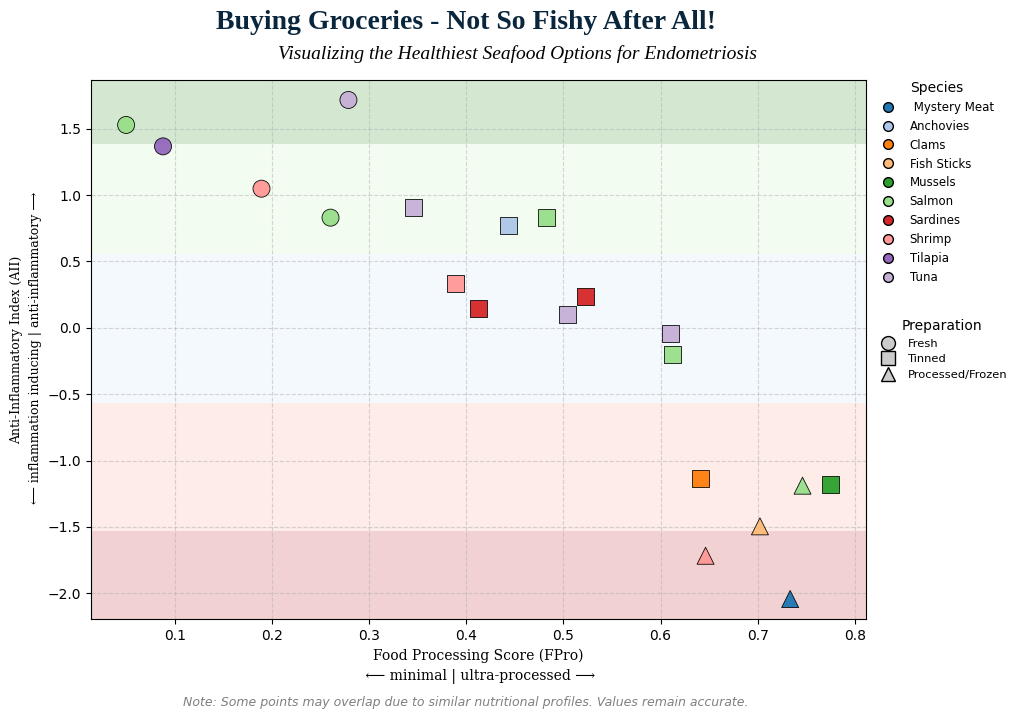

In [ ]:
if 'species' not in item_agg.columns:
    item_agg = item_agg.copy()
    item_agg['species'] = (
        item_agg['item_label']
        .str.split('·').str[1]
        .fillna('unspecified')
        .str.strip().str.lower()
    )

def normalize_species(sp):
    sp = str(sp).lower()
    if "salmon"   in sp: return "salmon"
    if "tuna"     in sp or "tuna in oil" in sp or "tuna in water" in sp: return "tuna"
    if "sardine"  in sp: return "sardines"
    if "mackerel" in sp: return "mackerel"
    if "anchov"   in sp: return "anchovies"
    if "herring"  in sp or "kipper" in sp: return "herring" # Added kipper as herring
    if "cod"      in sp: return "cod"
    if "tilapia"  in sp: return "tilapia"
    if "pollock"  in sp: return "pollock"
    if "shrimp"   in sp: return "shrimp"
    if "mussel"   in sp: return "mussels"
    if "scallop"  in sp: return "scallops"
    if "clam"     in sp: return "clams"
    if "crab"     in sp: return "crab"
    if "lobster"  in sp: return "lobster"
    if "oyster"   in sp: return "oysters"
    if "fish stick" in sp or "fishstick" in sp: return "fish sticks"
    if "fish"       in sp: return "fish (unspecified)"
    return sp

item_agg['species_group'] = item_agg['item_label'].apply(lambda x: normalize_species(x.split('·')[1] if '·' in x else x)) # Apply to the species part of item_label


## Color map per simplified species_group
cmaps = [plt.cm.tab20, plt.cm.tab20b, plt.cm.tab20c]
species_groups = sorted(item_agg['species_group'].dropna().unique().tolist())
species_colors = {}
for i, sp in enumerate(species_groups):
    cmap = cmaps[(i // 20) % len(cmaps)]
    species_colors[sp] = cmap(i % 20)


## Marker by seafood type (uniform size)
type_marker = {'fresh':'o', 'tinned':'s', 'processed/frozen':'^'}
MARKER_SIZE = 150

## background AII zones via quantiles
## Use the AII_category from the item_agg DataFrame for quantile calculation
q = item_agg['aii_mean'].quantile([0.10, 0.35, 0.65, 0.90]).to_dict()


## make the figure/axes
fig, ax = plt.subplots(figsize=(10, 7))

## Modify grouping here to average AII and FPro by item_label and seafood_type
item_agg_avg = (
    item_agg.groupby(['item_label', 'seafood_type', 'species_group'])
      .agg(fpro_mean=('fpro_mean','mean'),
           aii_mean=('aii_mean','mean'),
           n=('n','sum')) # Sum the counts for the new aggregated groups
      .reset_index()
)

## Apply the minimum count filter
min_n = 3
item_agg_avg = item_agg_avg[item_agg_avg['n'] >= min_n]


##lock y-limits to data and remove padding so bands fill to the edges
ymin_data, ymax_data = item_agg_avg['aii_mean'].min(), item_agg_avg['aii_mean'].max()
pad = 0.04 * (ymax_data - ymin_data)
ax.set_ylim(ymin_data - pad, ymax_data + pad)
ax.margins(y=0)

## now get the exact axis limits and draw bands to those
lo, hi = ax.get_ylim()
bounds = [lo, q[0.10], q[0.35], q[0.65], q[0.90], hi]

zone_rgba = [
    (179/255,   0/255,   0/255, 0.18),  # Most Harmful
    (245/255,  73/255,  39/255, 0.10),  # Harmful
    (115/255, 179/255, 232/255, 0.08),  # Neutral
    (142/255, 232/255, 115/255, 0.10),  # Beneficial
    ( 11/255, 122/255,  00/255, 0.18),  # Most Beneficial
]

for (y0, y1), rgba in zip(zip(bounds[:-1], bounds[1:]), zone_rgba):
    ax.axhspan(y0, y1, facecolor=rgba, edgecolor='none', zorder=0)

## scatter
for stype, sub in item_agg_avg.groupby('seafood_type'):
    mk = type_marker.get(stype, 'o')
    ax.scatter(
        sub['fpro_mean'], sub['aii_mean'],
        s=MARKER_SIZE,
        c=sub['species_group'].map(species_colors),
        marker=mk, edgecolors='black', linewidths=0.6, alpha=0.95, zorder=2
    )

# # Add custom annotations and fallback function here
# custom_annotations = {
#     'fresh · tuna': 'Tuna',
#     'fresh · salmon · frozen': 'Salmon',
#     'fresh · shrimp': 'Shrimp',
#     'fresh · salmon': 'Salmon',
#     'fresh · tilapia': 'Tilapia',
#     'tinned · anchovies · in oil': 'Anchovies (Oil)',
#     'tinned · sardines · smoked': 'Smoked Sardines',
#     'fresh · lobster · frozen': 'Lobster',
#     'tinned · tuna · in water': 'Tuna (Water)',
#     'tinned · salmon': 'Tin Salmon',
#     'fresh · cod · frozen': 'Cod',
#     'tinned · tuna · in oil': 'Tuna (Oil)',
#     'tinned · salmon · smoked': 'Smoked Salmon',
#     'tinned · sardines · in oil': 'Sardines (Oil)',
#     'tinned · tuna': 'Tin Tuna',
#     'processed/frozen · cod · frozen': 'Cod',
#     'tinned · shrimp': 'Tin Shrimp',
#     'tinned · squid': 'Tin Squid',
#     'processed/frozen · salmon · frozen': 'Salmon (Processed)',
#     'tinned · herring': 'Tin Herring',
#     'tinned · sardines · in tomato sauce': 'Sardines (Tomato)',
#     'tinned · crab': 'Tin Crab',
#     'processed/frozen · shrimp · frozen': 'Shrimp',
#     'tinned · clams': 'Tin Clams',
#     'tinned · mussels': 'Tin Mussels',
#     'processed/frozen · fish sticks · fish sticks': 'Fish Sticks',
#     'processed/frozen · mystery meat · breaded': 'Breaded Mystery Fish',
#     'processed/frozen · shrimp · breaded': 'Breaded Shrimp'
# }

# def _fallback_label(lbl: str) -> str:
#     parts = [p.strip() for p in (lbl or "").split("·")]
#     if not parts: return lbl
#     head = parts[0].strip().title()
#     rest = " — ".join(p.strip().lower().capitalize() for p in parts[1:]) if len(parts) > 1 else ""
#     return f"{head} {rest}".strip()


# # Add annotations
# texts = []
# for _, row in item_agg_avg.iterrows():
#     label = row['item_label']
#     # Use a simplified label for annotation if available, otherwise use item_label
#     display_label = custom_annotations.get(label, label.split('·')[-1].strip().title())

#     texts.append(ax.annotate(display_label, (row['fpro_mean'], row['aii_mean']),
#                              textcoords='offset points', xytext=(5,5), fontsize=8))

# # Use adjustText to prevent labels from overlapping
# try:
#     from adjustText import adjust_text
#     adjust_text(texts,
#                 expand_points=(1.2, 1.2),
#                 arrowprops=dict(arrowstyle='-', color='grey', lw=0.5))
# except Exception:
#     pass


## legend
species_handles = [
    Line2D([0],[0], marker='o', color='none',
           markerfacecolor=species_colors[sp], markeredgecolor='black',
           label=sp.title(), markersize=7)
    for sp in species_groups
]

shape_handles = [
    Line2D([0],[0], marker=type_marker[k], color='none',
           markerfacecolor='#cccccc', markeredgecolor='black',
           label=k.title(), markersize=10)
    for k in ['fresh', 'tinned', 'processed/frozen']
]

# Combine legends side-by-side vertically on the right
leg1 = ax.legend(
    handles=species_handles,
    title="Species",
    loc="center left",
    bbox_to_anchor=(1.00, 0.81),
    frameon=False,
    fontsize=8.5,
    title_fontsize=10,
    ncol=1
)
ax.add_artist(leg1)

leg2 = ax.legend(
    handles=shape_handles,
    title="Preparation",
    loc="center left",
    bbox_to_anchor=(1.00, 0.50),
    frameon=False,
    fontsize=8.25,
    title_fontsize=10,
    ncol=1
)


# (C) Bands legend (AII background zones)
#zone_labels = ["Most Harmful", "Harmful", "Neutral", "Beneficial", "Most Beneficial"]
#zone_handles = [
    #Patch(facecolor=c, edgecolor='none', label=lbl)
    #for c, lbl in zip(zone_rgba, zone_labels)
#]

#leg3 = ax.legend(
    #handles=zone_handles,
    #title="Health Impact",
    #loc="center left",
    #bbox_to_anchor=(1.00, 0.28),
    #frameon=False,
    #fontsize=8.5,
    #title_fontsize=10,
    #ncol=1
#)

# Make sure there’s enough room on the right for 3 stacked legends
plt.subplots_adjust(right=0.90)

fig.suptitle("Buying Groceries - Not So Fishy After All!", y=0.98, fontsize=20, fontfamily='Liberation Serif', fontweight='bold', color='#0A263D', ha='center')
ax.set_title("Visualizing the Healthiest Seafood Options for Endometriosis", fontsize=14, pad=15, fontstyle='italic',
             fontfamily='Liberation Serif', ha='center', x=0.55)
ax.set_xlabel("Food Processing Score (FPro)\n ⟵ minimal | ultra-processed ⟶",
    fontsize=10,
    linespacing=1.6, fontfamily='DejaVu Serif'
)
ax.set_ylabel("Anti-Inflammatory Index (AII)\n ⟵ inflammation inducing | anti-inflammatory ⟶",
                  fontsize=9,
    linespacing=1.6, fontfamily='DejaVu Serif')
ax.grid(True, linestyle='--', alpha=0.5)
#plt.tight_layout()
fig.text(
    0.5, 0,
    "Note: Some points may overlap due to similar nutritional profiles. Values remain accurate.",
    ha='center', va='top',
    fontsize=9, color='gray', style='italic'
)
plt.show()

##Final Plot
After much experimentation and back and forth, this is the final visualization I came up with!

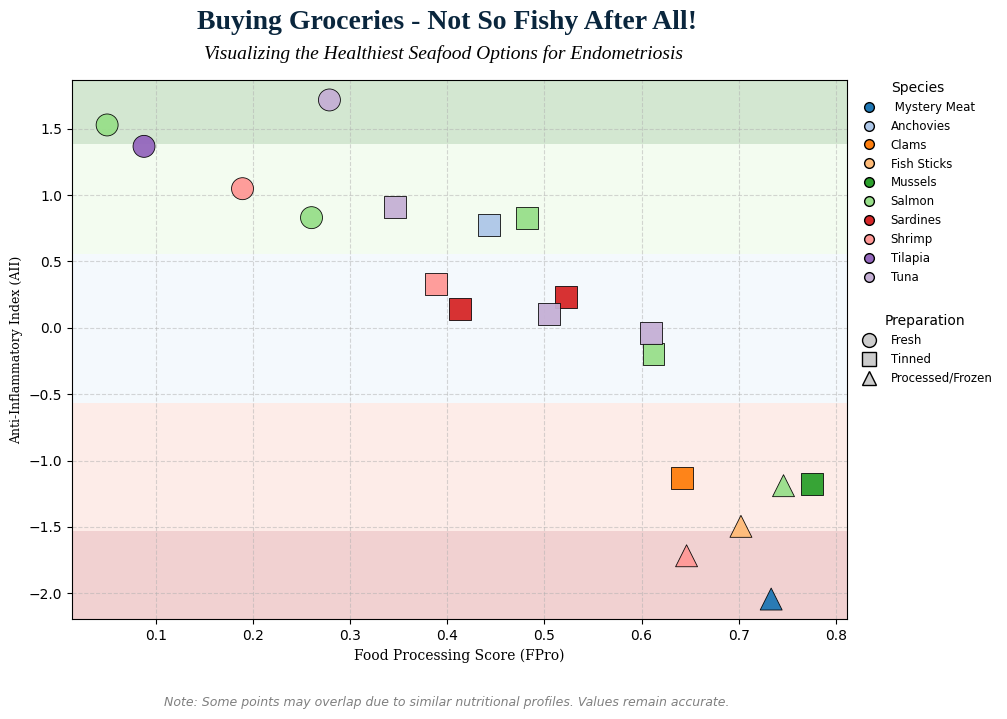

In [ ]:
type_marker = {'fresh':'o', 'tinned':'s', 'processed/frozen':'^'}
MARKER_SIZE = 250

q = item_agg['aii_mean'].quantile([0.10, 0.35, 0.65, 0.90]).to_dict()


fig, ax = plt.subplots(figsize=(10, 7))

ymin_data, ymax_data = item_agg_avg['aii_mean'].min(), item_agg_avg['aii_mean'].max()
pad = 0.04 * (ymax_data - ymin_data)
ax.set_ylim(ymin_data - pad, ymax_data + pad)
ax.margins(y=0)

## now get the exact axis limits and draw bands to those
lo, hi = ax.get_ylim()
bounds = [lo, q[0.10], q[0.35], q[0.65], q[0.90], hi]

zone_rgba = [
    (179/255,   0/255,   0/255, 0.18),  # Most Harmful
    (245/255,  73/255,  39/255, 0.10),  # Harmful
    (115/255, 179/255, 232/255, 0.08),  # Neutral
    (142/255, 232/255, 115/255, 0.10),  # Beneficial
    ( 11/255, 122/255,  00/255, 0.18),  # Most Beneficial
]

for (y0, y1), rgba in zip(zip(bounds[:-1], bounds[1:]), zone_rgba):
    ax.axhspan(y0, y1, facecolor=rgba, edgecolor='none', zorder=0)

## scatter
for stype, sub in item_agg_avg.groupby('seafood_type'):
    mk = type_marker.get(stype, 'o')
    ax.scatter(
        sub['fpro_mean'], sub['aii_mean'],
        s=MARKER_SIZE,
        c=sub['species_group'].map(species_colors),
        marker=mk, edgecolors='black', linewidths=0.6, alpha=0.95, zorder=2
    )

## legend

species_handles = [
    Line2D([0],[0], marker='o', color='none',
           markerfacecolor=species_colors[sp], markeredgecolor='black',
           label=sp.title(), markersize=7)
    for sp in species_groups
]

shape_handles = [
    Line2D([0],[0], marker=type_marker[k], color='none',
           markerfacecolor='#cccccc', markeredgecolor='black',
           label=k.title(), markersize=10)
    for k in type_marker.keys()
]

leg1 = ax.legend(
    handles=species_handles,
    title="Species",
    loc="center left",
    bbox_to_anchor=(1.00, 0.81),
    frameon=False,
    fontsize=8.5,
    title_fontsize=10,
    ncol=1
)
ax.add_artist(leg1)

leg2 = ax.legend(
    handles=shape_handles,
    title="Preparation",
    loc="center left",
    bbox_to_anchor=(1.00, 0.50),
    frameon=False,
    fontsize=8.5,
    title_fontsize=10,
    ncol=1
)

plt.subplots_adjust(right=0.90)

## axis and titles
fig.suptitle("Buying Groceries - Not So Fishy After All!", y=0.98, fontsize=20, fontfamily='Liberation Serif', fontweight='bold', color='#0A263D', ha='center')
ax.set_title("Visualizing the Healthiest Seafood Options for Endometriosis", fontsize=14, pad=15, fontstyle='italic',
             fontfamily='Liberation Serif', ha='center', x=0.48)
ax.set_xlabel("Food Processing Score (FPro)",
    fontsize=10,
    linespacing=1.6, fontfamily='DejaVu Serif'
)
ax.set_ylabel("Anti-Inflammatory Index (AII)",
                  fontsize=9,
    linespacing=1.6, fontfamily='DejaVu Serif')
ax.grid(True, linestyle='--', alpha=0.5)
fig.text(
    0.5, 0,
    "Note: Some points may overlap due to similar nutritional profiles. Values remain accurate.",
    ha='center', va='top',
    fontsize=9, color='gray', style='italic'
)
plt.show()